<h1 style="text-align: center;">Deep Learning<br><br>Image Classification with CNN<br><br>CIFAR-10 Data<br><h1>

# Dataset Info

The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with
10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks.

Here are the classes in the dataset, as well as 10 random images from each:

<p align="center">
  <img src="https://production-media.paperswithcode.com/datasets/4fdf2b82-2bc3-4f97-ba51-400322b228b1.png" width="auto" height="400">
</p>

In [1]:
try:
    import jupyter_black
    jupyter_black.load()
except ImportError:
    print("You can safely ignore this message.")

You can safely ignore this message.


In [2]:
import os

# Set TF log level to ignore INFOs
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "1"

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras

# import warnings
# warnings.filterwarnings("ignore")
# warnings.warn("this will not show")

plt.rcParams["figure.figsize"] = (10, 6)

sns.set_style("whitegrid")
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# Set it None to display all rows in the dataframe
# pd.set_option('display.max_rows', None)

# Set it to None to display all columns in the dataframe
pd.set_option("display.max_columns", None)

In [4]:
import tensorflow as tf

if tf.config.list_physical_devices("GPU"):
    print("GPU support is enabled for this session.")
else:
    print("CPU will be used for this session.")

GPU support is enabled for this session.


In [5]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) `tensorflow` random seed
# 3) `python` random seed
SEED = 42
keras.utils.set_random_seed(SEED)

# This will make TensorFlow ops as deterministic as possible, but it will
# affect the overall performance, so it's not enabled by default.
# `enable_op_determinism()` is introduced in TensorFlow 2.9.
tf.config.experimental.enable_op_determinism()

# Recognizing and Understanding Data

In [6]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 16s 0us/step


In [7]:
print(f"There are {len(X_train)} images in the training dataset")
print(f"There are {len(X_test)} images in the test dataset")

There are 50000 images in the training dataset
There are 10000 images in the test dataset


In [8]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [9]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

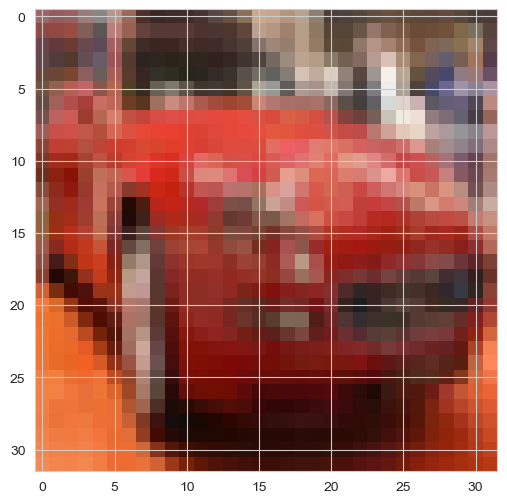

In [10]:
plt.imshow(X_train[5])
plt.show()

In [11]:
# 1= Automobile
y_train[5]

array([1], dtype=uint8)

In [12]:
y_train.shape

(50000, 1)

In [13]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [14]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [15]:
classes = [
    "airplane",
    "automobile",
    "bird",
    "cat",
    "deer",
    "dog",
    "frog",
    "horse",
    "ship",
    "truck",
]

In [16]:
y_train[0]

array([6], dtype=uint8)

In [17]:
classes[y_train[0][0]]

'frog'

In [18]:
classes[int(y_train[0])]

C:\Users\serda\AppData\Local\Temp\ipykernel_2088\2274310142.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(y_train[0])]


'frog'

In [ ]:
# int(np.random.randint(low=0, high=50000, size=1))

In [ ]:
# X_train[int(np.random.randint(low=0, high=50000, size=1))]

C:\Users\serda\AppData\Local\Temp\ipykernel_2088\2055469215.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  rand_index = int(np.random.randint(low=0, high=50000, size=1))
C:\Users\serda\AppData\Local\Temp\ipykernel_2088\2055469215.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax.set_title(classes[int(y_train[rand_index])])


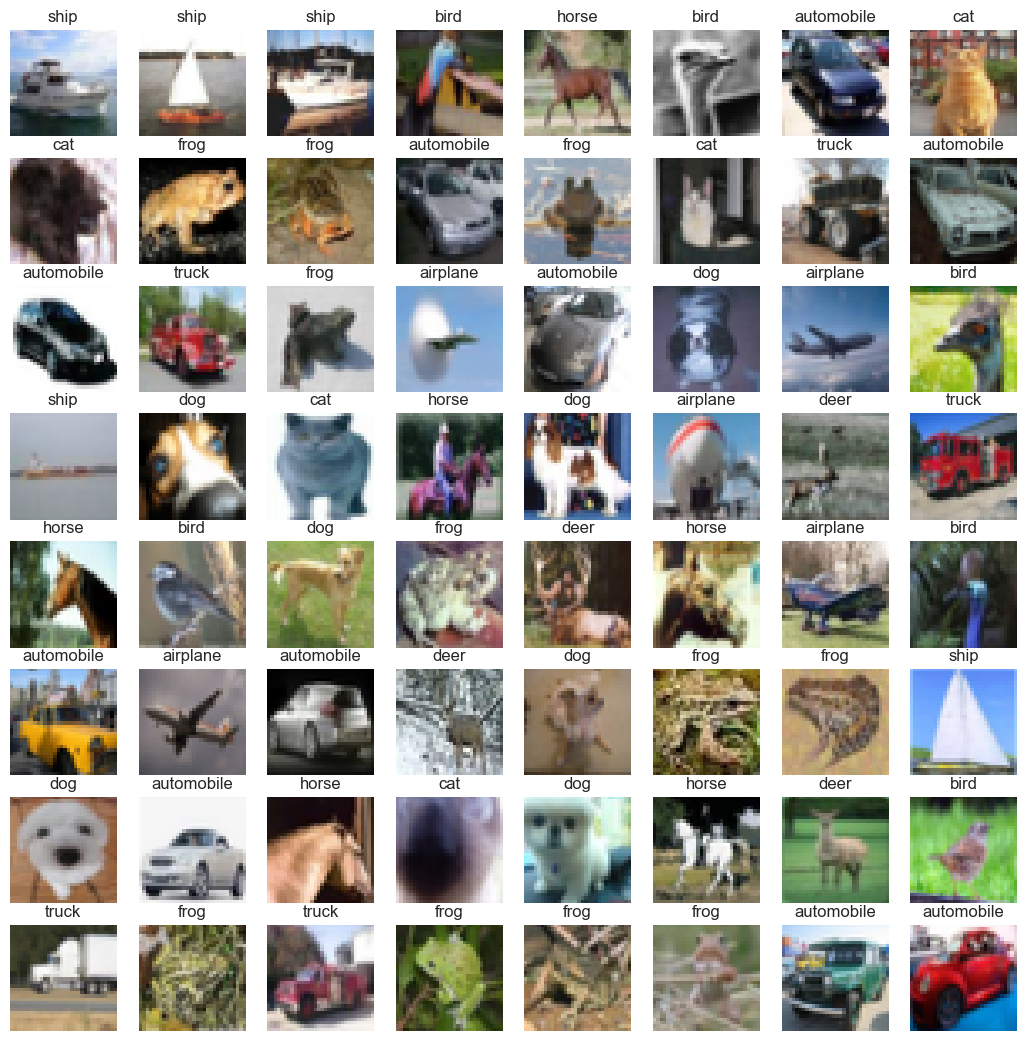

In [19]:
fig, axes = plt.subplots(8, 8)
fig.set_size_inches(13, 13)
for ax in axes.flatten():
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    ax.axis("off")
    ax.set_title(classes[int(y_train[rand_index])])
    ax.imshow(X_train[rand_index])
plt.show()

# Data Preprocessing

In [20]:
X_train[5].min()

0

In [21]:
X_train[5].max()

252

In [22]:
# Normalize image pixels

X_train = X_train.astype("float32")
X_test = X_test.astype("float32")
X_train /= 255
X_test /= 255

In [23]:
X_train[5].min()

0.0

In [24]:
X_train[5].max()

0.9882353

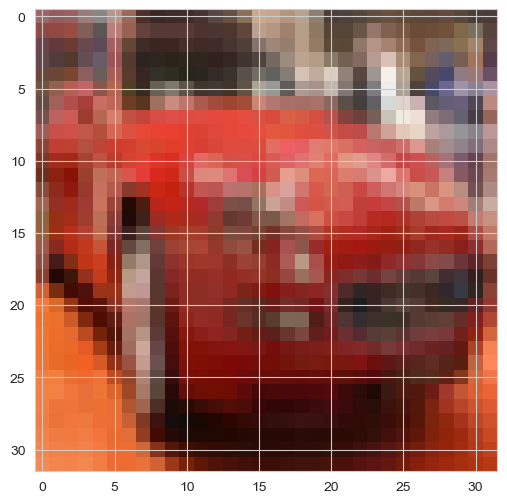

In [25]:
plt.imshow(X_train[5])
plt.show()

In [26]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [27]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [28]:
from tensorflow.keras.utils import to_categorical

In [29]:
Y_train = to_categorical(y_train, 10)
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [30]:
y_train[0]

array([6], dtype=uint8)

In [31]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

# Modelling-1

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [33]:
print(32 * (3 * 3 * 3 + 1))
print(48 * (3 * 3 * 32 + 1))

896
13872


In [34]:
# we have 4 layers in the feature processing section (1 conv 1 pooling + 1 conv 1 pooling), then flatten and fully connected
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3), # feature detector. filter
        input_shape=(32, 32, 3),
        activation="relu",
        padding="same",
    )
)
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=48, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation="relu")) # Why 128, this is random but we start with a nominal number and then decrease
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 48)        13872     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 48)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 128)               3

In [36]:
from tensorflow.keras.callbacks import EarlyStopping

In [37]:
early_stop = EarlyStopping(monitor="val_loss", patience=4, restore_best_weights=True)

In [38]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50
1563/1563 [==============================] - 21s 9ms/step - loss: 1.3700 - accuracy: 0.5069 - val_loss: 1.0750 - val_accuracy: 0.6211
Epoch 2/50
1563/1563 [==============================] - 14s 9ms/step - loss: 0.9907 - accuracy: 0.6517 - val_loss: 0.9903 - val_accuracy: 0.6519
Epoch 3/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.8486 - accuracy: 0.7022 - val_loss: 0.8836 - val_accuracy: 0.6935
Epoch 4/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.7507 - accuracy: 0.7362 - val_loss: 0.8736 - val_accuracy: 0.6986
Epoch 5/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.6585 - accuracy: 0.7699 - val_loss: 0.8636 - val_accuracy: 0.7106
Epoch 6/50
1563/1563 [==============================] - 16s 10ms/step - loss: 0.5810 - accuracy: 0.7972 - val_loss: 0.9220 - val_accuracy: 0.7070
Epoch 7/50
1563/1563 [==============================] - 15s 10ms/step - loss: 0.5070 - accuracy: 0.8206 - val_loss: 0.9279 - v

In [39]:
model.metrics_names

['loss', 'accuracy']

In [40]:
summary = pd.DataFrame(model.history.history)
summary.head(7)

,loss,accuracy,val_loss,val_accuracy
0,1.370,0.507,1.075,0.621
1,0.991,0.652,0.990,0.652
2,0.849,0.702,0.884,0.693
3,0.751,0.736,0.874,0.699
4,0.659,0.770,0.864,0.711
5,0.581,0.797,0.922,0.707
6,0.507,0.821,0.928,0.707


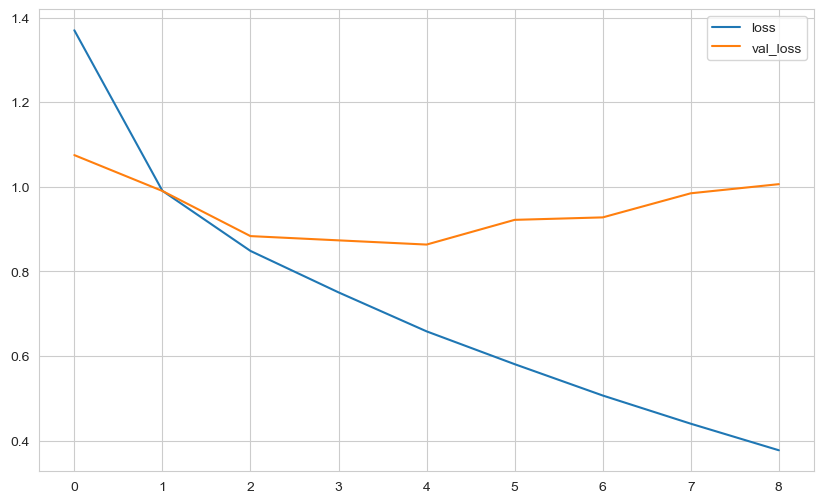

In [41]:
summary[["loss", "val_loss"]].plot()
plt.show()

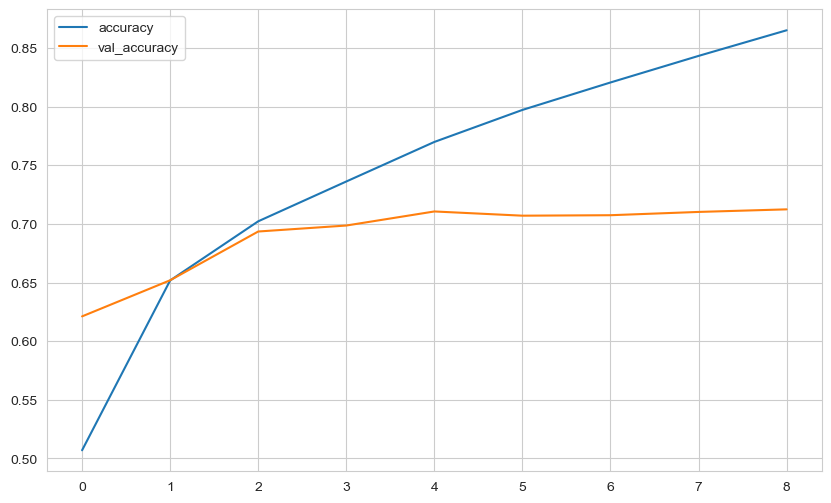

In [42]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [43]:
from sklearn.metrics import classification_report, confusion_matrix

In [44]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 7ms/step - loss: 0.8636 - accuracy: 0.7106


[0.863636314868927, 0.7106000185012817]

In [45]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.863636314868927
Test accuracy: 0.7106000185012817


In [46]:
pred_prob = model.predict(X_test)
pred_prob

313/313 [==============================] - 2s 4ms/step


array([[4.95520246e-04, 1.47642058e-04, 3.15223035e-04, ...,
        1.36800227e-03, 6.80958433e-03, 3.00030428e-04],
       [3.66319582e-04, 2.04055733e-03, 4.47347844e-07, ...,
        7.38936823e-09, 9.97109830e-01, 4.77632537e-04],
       [1.20373115e-01, 9.34426766e-03, 2.39917380e-03, ...,
        1.23693084e-03, 8.58619452e-01, 6.07641693e-03],
       ...,
       [9.47754481e-04, 9.14875909e-06, 7.57814497e-02, ...,
        6.82581440e-02, 9.93433292e-04, 5.71227938e-05],
       [6.06054149e-04, 8.71397316e-01, 1.38908802e-02, ...,
        6.85540959e-04, 5.89072530e-04, 5.36022650e-04],
       [8.70421104e-07, 7.25276209e-07, 1.84892797e-05, ...,
        9.94578600e-01, 4.93845562e-07, 1.61143205e-07]], dtype=float32)

In [47]:
y_pred = np.argmax(pred_prob, axis=1)

In [48]:
y_pred

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [49]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.73      1000
           1       0.82      0.84      0.83      1000
           2       0.63      0.53      0.58      1000
           3       0.49      0.60      0.54      1000
           4       0.71      0.63      0.67      1000
           5       0.64      0.60      0.62      1000
           6       0.74      0.78      0.76      1000
           7       0.75      0.80      0.77      1000
           8       0.79      0.85      0.82      1000
           9       0.79      0.79      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



In [50]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [51]:
print(confusion_matrix(y_test, y_pred))

[[699  27  50  36  24   7  10  12 100  35]
 [ 18 836   6   9   3   3   3   4  24  94]
 [ 56   7 526  96  94  62  81  50  16  12]
 [ 16  13  42 605  44 134  69  43  17  17]
 [ 14   4  72  87 627  44  63  70  17   2]
 [  7   2  36 217  31 600  29  56  11  11]
 [  3   9  47  92  23  32 780   4   5   5]
 [ 14   2  35  56  30  45   2 795   7  14]
 [ 47  35   9  16   4   4   7   6 851  21]
 [ 29  88   6  22   1   5   5  25  32 787]]


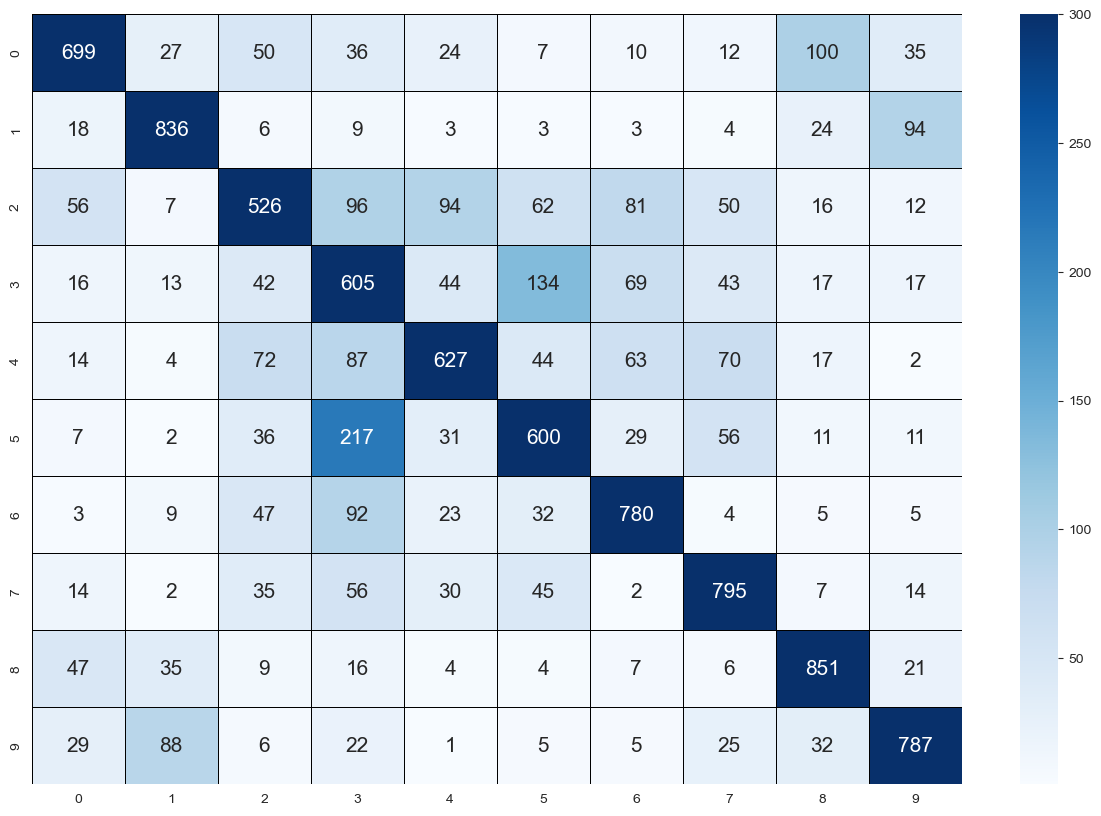

In [52]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 15},
    vmax=300,
)
plt.show()

# Modelling-2

In [53]:
# conv conv pooling dropout + conv pooling dropout
model = Sequential()

model.add(
    Conv2D(
        filters=32,
        kernel_size=(3, 3),
        activation="relu",
        input_shape=(32, 32, 3),
        padding="same",
    )
)
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu", padding="same"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(filters=128, kernel_size=(3, 3), activation="relu"))
model.add(MaxPool2D((2, 2)))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])   

In [54]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [55]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50
1563/1563 [==============================] - 24s 14ms/step - loss: 1.4269 - accuracy: 0.4845 - val_loss: 1.0403 - val_accuracy: 0.6382
Epoch 2/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.9911 - accuracy: 0.6510 - val_loss: 0.8925 - val_accuracy: 0.6917
Epoch 3/50
1563/1563 [==============================] - 24s 15ms/step - loss: 0.8677 - accuracy: 0.6944 - val_loss: 0.8083 - val_accuracy: 0.7203
Epoch 4/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7883 - accuracy: 0.7254 - val_loss: 0.7896 - val_accuracy: 0.7289
Epoch 5/50
1563/1563 [==============================] - 25s 16ms/step - loss: 0.7336 - accuracy: 0.7428 - val_loss: 0.7862 - val_accuracy: 0.7302
Epoch 6/50
1563/1563 [==============================] - 26s 16ms/step - loss: 0.6880 - accuracy: 0.7578 - val_loss: 0.7419 - val_accuracy: 0.7445
Epoch 7/50
1563/1563 [==============================] - 34s 22ms/step - loss: 0.6503 - accuracy: 0.7709 - val_loss: 0.7244 -

In [56]:
summary = pd.DataFrame(model.history.history)
summary

,loss,accuracy,val_loss,val_accuracy
0,1.427,0.485,1.040,0.638
1,0.991,0.651,0.892,0.692
2,0.868,0.694,0.808,0.720
3,0.788,0.725,0.790,0.729
4,0.734,0.743,0.786,0.730
5,0.688,0.758,0.742,0.744
6,0.650,0.771,0.724,0.752
7,0.623,0.779,0.714,0.752
8,0.594,0.790,0.716,0.757
9,0.571,0.799,0.692,0.762


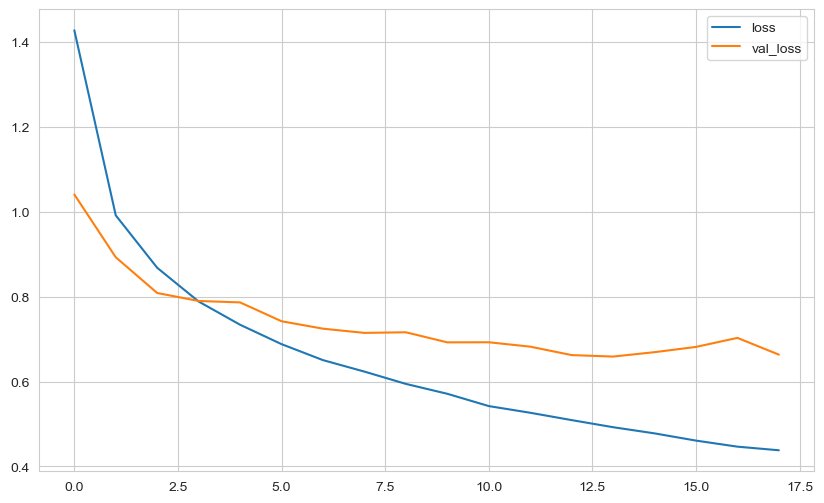

In [57]:
summary[["loss", "val_loss"]].plot()
plt.show()

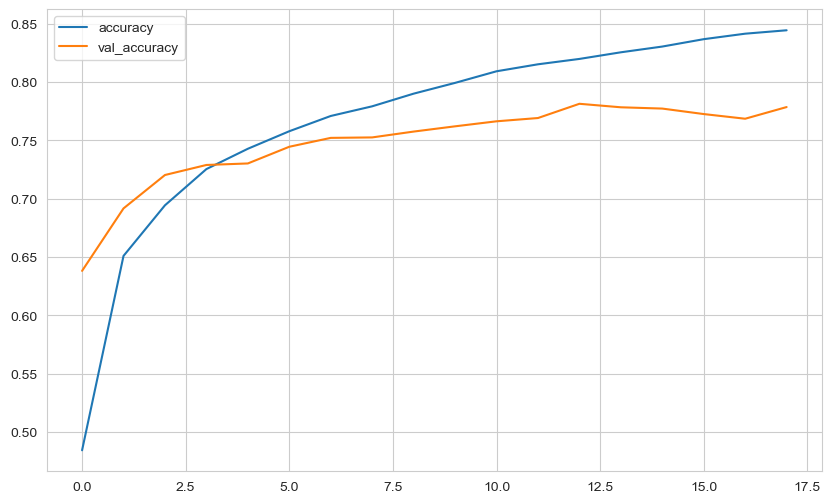

In [58]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [59]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 10ms/step - loss: 0.6587 - accuracy: 0.7783


[0.6587148308753967, 0.7782999873161316]

In [60]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.6587148308753967
Test accuracy: 0.7782999873161316


In [61]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 3s 8ms/step


In [62]:
y_pred = np.argmax(pred_prob, axis=1)

In [63]:
y_pred

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [64]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1000
           1       0.87      0.90      0.88      1000
           2       0.78      0.61      0.68      1000
           3       0.56      0.66      0.61      1000
           4       0.71      0.78      0.75      1000
           5       0.71      0.64      0.67      1000
           6       0.79      0.85      0.82      1000
           7       0.84      0.83      0.84      1000
           8       0.87      0.85      0.86      1000
           9       0.87      0.85      0.86      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



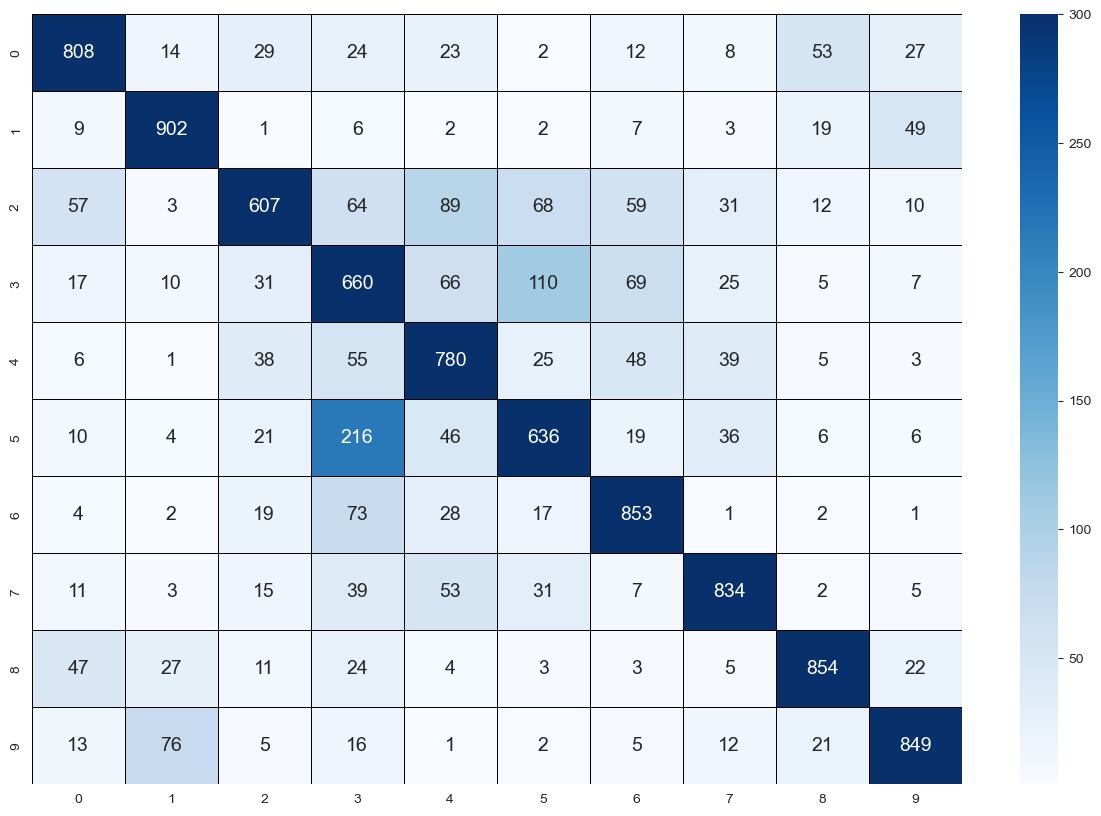

In [65]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)
plt.show()

In [66]:
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

# Modelling-3

In [67]:
from tensorflow.keras.layers import BatchNormalization

**BatchNormalization**

- Layer that normalizes its inputs.
- Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
    - Technique for training very deep neural networks.
    - Standardizes the inputs to a layer for each mini-batch.
    - Stabilizes the learning process,
    - Reduces the number of training epochs.
![BN1.PNG](https://miro.medium.com/max/709/0*2qZOVh96GZ-a_XdS.png)
![BN2.PNG](https://cesarlaurent.files.wordpress.com/2015/04/bn.png)

In [68]:
model = Sequential()

model.add(
    Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=(32, 32, 3))
)
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(Conv2D(256, (3, 3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(64, activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [69]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_1 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [70]:
model.fit(
    X_train,
    Y_train,
    batch_size=32,
    epochs=50,
    validation_data=(X_test, Y_test),
    callbacks=[early_stop],
)

Epoch 1/50
1563/1563 [==============================] - 62s 35ms/step - loss: 1.9632 - accuracy: 0.2981 - val_loss: 1.5788 - val_accuracy: 0.4161
Epoch 2/50
1563/1563 [==============================] - 51s 32ms/step - loss: 1.4593 - accuracy: 0.4726 - val_loss: 1.3407 - val_accuracy: 0.5200
Epoch 3/50
1563/1563 [==============================] - 51s 33ms/step - loss: 1.2432 - accuracy: 0.5681 - val_loss: 1.0906 - val_accuracy: 0.6155
Epoch 4/50
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1104 - accuracy: 0.6209 - val_loss: 0.9355 - val_accuracy: 0.6808
Epoch 5/50
1563/1563 [==============================] - 56s 36ms/step - loss: 1.0218 - accuracy: 0.6565 - val_loss: 1.2902 - val_accuracy: 0.5866
Epoch 6/50
1563/1563 [==============================] - 59s 38ms/step - loss: 0.9355 - accuracy: 0.6915 - val_loss: 0.7746 - val_accuracy: 0.7332
Epoch 7/50
1563/1563 [==============================] - 46s 29ms/step - loss: 0.8881 - accuracy: 0.7095 - val_loss: 0.8608 -

In [72]:
summary = pd.DataFrame(model.history.history)
summary.tail()

,loss,accuracy,val_loss,val_accuracy
16,0.632,0.800,0.503,0.836
17,0.608,0.806,0.522,0.828
18,0.597,0.810,0.591,0.809
19,0.590,0.813,0.526,0.826
20,0.574,0.816,0.521,0.831


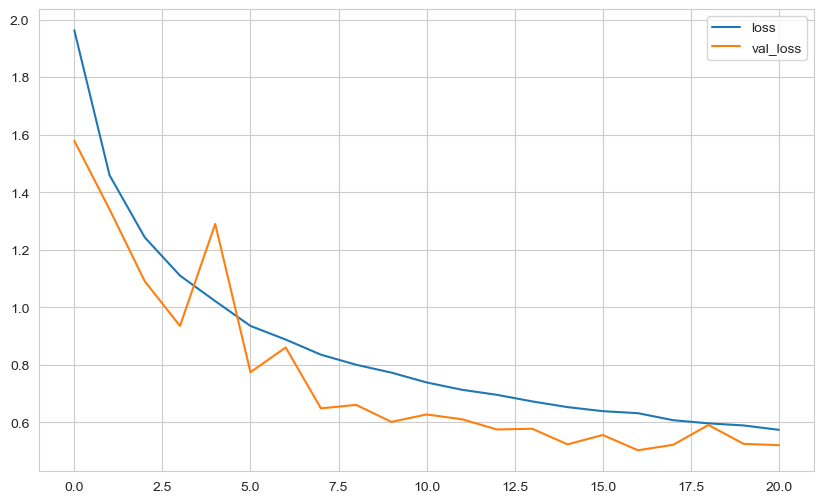

In [73]:
summary[["loss", "val_loss"]].plot()
plt.show()

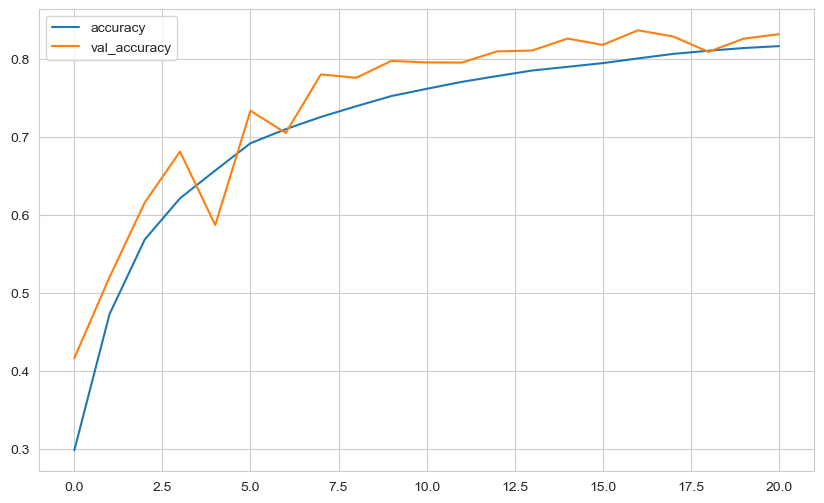

In [74]:
summary[["accuracy", "val_accuracy"]].plot()
plt.show()

# Evaluation on Test Data

In [75]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.5033 - accuracy: 0.8362


[0.5032913088798523, 0.8361999988555908]

In [76]:
score = model.evaluate(X_test, Y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.5032913088798523
Test accuracy: 0.8361999988555908


In [77]:
pred_prob = model.predict(X_test)

313/313 [==============================] - 2s 6ms/step


In [78]:
y_pred = np.argmax(pred_prob, axis=1)

In [79]:
y_pred

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [80]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1000
           1       0.92      0.92      0.92      1000
           2       0.86      0.69      0.77      1000
           3       0.66      0.71      0.69      1000
           4       0.84      0.81      0.83      1000
           5       0.70      0.80      0.74      1000
           6       0.87      0.89      0.88      1000
           7       0.91      0.86      0.88      1000
           8       0.92      0.90      0.91      1000
           9       0.87      0.93      0.90      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



<Axes: >

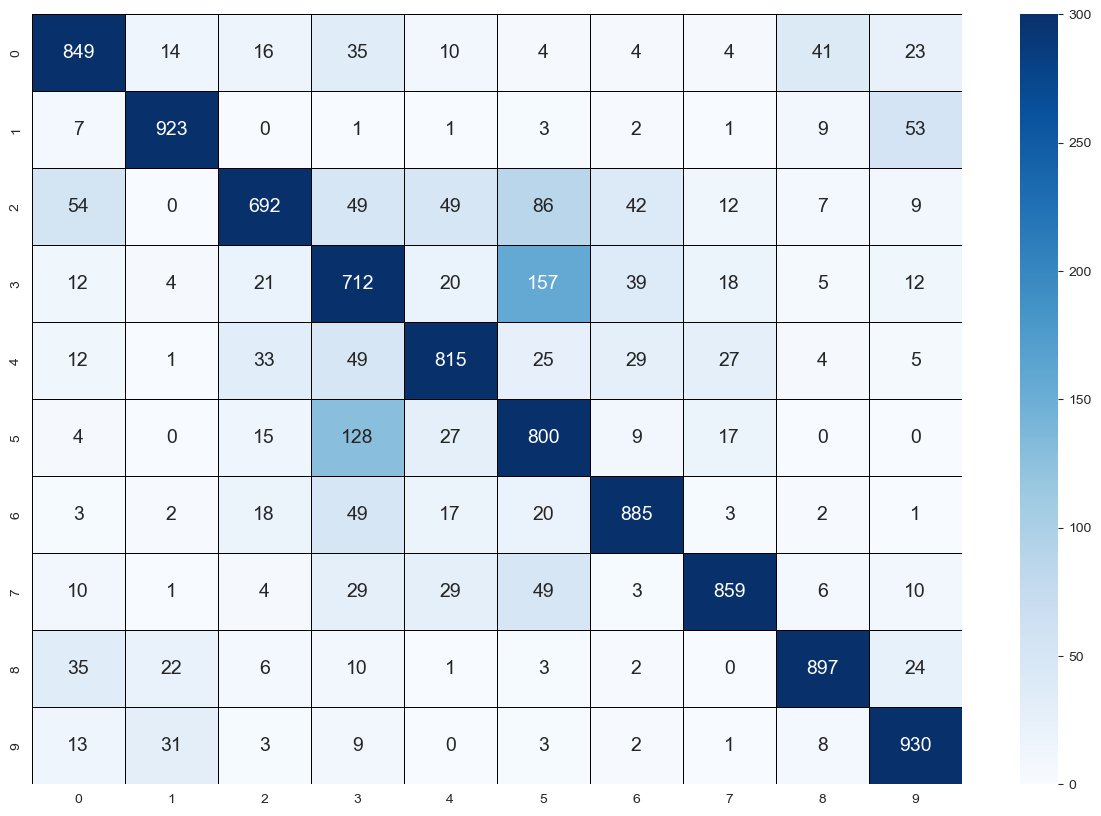

In [81]:
plt.figure(figsize=(15, 10))
sns.heatmap(
    confusion_matrix(y_test, y_pred),
    annot=True,
    cmap="Blues",
    linewidths=0.5,
    linecolor="black",
    fmt="g",
    annot_kws={"size": 14},
    vmax=300,
)

# Prediction

In [82]:
my_image = X_test[44]

In [83]:
my_image.shape

(32, 32, 3)

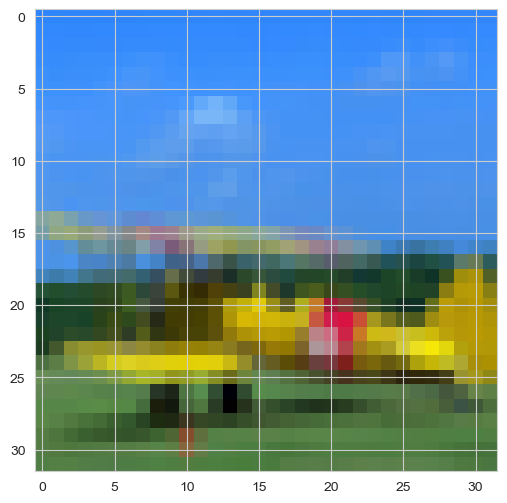

In [84]:
plt.imshow(my_image)
plt.show()

In [85]:
image_prediction = model.predict(my_image.reshape(1, 32, 32, 3))

1/1 [==============================] - 0s 272ms/step


In [86]:
image_prediction

array([[9.98285592e-01, 3.30776274e-05, 5.76811435e-04, 6.81088422e-05,
        1.11718786e-04, 1.63189579e-05, 6.54384212e-06, 3.43242173e-05,
        6.79532648e-04, 1.88063525e-04]], dtype=float32)

In [87]:
np.argmax(image_prediction, axis=1)

array([0], dtype=int64)

In [88]:
result = np.argmax(image_prediction, axis=1)

In [89]:
result

array([0], dtype=int64)

In [90]:
classes[int(result)]

C:\Users\serda\AppData\Local\Temp\ipykernel_2088\2708051357.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  classes[int(result)]


'airplane'

In [91]:
model.save("cnn-1.h5")

# Load the Saved Model and Get Predictions

In [92]:
model = tf.keras.models.load_model("cnn-1.h5")

In [93]:
X_test[15].shape

(32, 32, 3)

In [97]:
np.expand_dims(X_test[15], axis=0).shape

(1, 32, 32, 3)

In [98]:
pred = model.predict(np.expand_dims(X_test[15], axis=0))

1/1 [==============================] - 0s 298ms/step


In [99]:
np.argmax(pred)

8

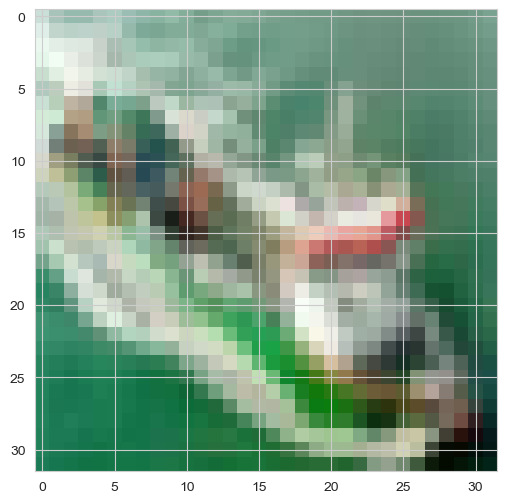

In [100]:
plt.imshow(X_test[15])
plt.show()

In [101]:
classes[8]

'ship'

END OF THE PROJECT